# Import Libraries

In [2]:
#Import Libraries 

import pandas as pd
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, plot_confusion_matrix, f1_score, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
from imblearn.over_sampling import RandomOverSampler

#multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Import Data

In [3]:
#Data Import 


df_bank = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv")
df_bankholdout = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv")
df_bankholdout_mini = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv")

# Explore the Data & Objectives


1) Finding interesting customer segments based on their previous marketing campaign.

2) Finding a way to identify the types of customers most likely to respond favorably to future marketing campaigns.

3) Proving to a skeptical Senhor Ferreira that a targeted campaign based on data science will significantly outperform a campaign made up of randomly selected customers.



## Examine

In [ ]:
df_bank.head()
df_bank.describe()
df_bank.info()
df_bank['pdays'].value_counts()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [ ]:
# The secondary sets
df_bankholdout.head(5)
df_bankholdout_mini.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,29,management,married,university.degree,no,no,yes,cellular,aug,wed,2,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1
1,46,management,single,university.degree,no,yes,no,cellular,jul,mon,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1
2,56,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
3,54,retired,divorced,basic.4y,no,no,no,telephone,jun,mon,3,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1
4,47,blue-collar,married,basic.6y,unknown,yes,no,cellular,may,mon,4,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1


## Visualize

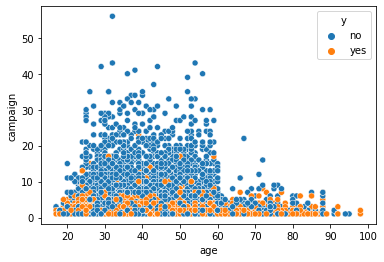

In [ ]:
#Scatter Plot Age~Campaign

sns.scatterplot(data=df_bank, x="age", y="campaign", hue="y")

In [ ]:
# Seaborn Graph
# Trying to identify who will buy a CD

# This is commented out so that the notebook doesn't take 5+ minutes to run all
# the cells. The image is saved in the following text block. Uncomment if you 
# need to run it again.
# sns.pairplot(df_bank, hue="y", diag_kind="hist") 

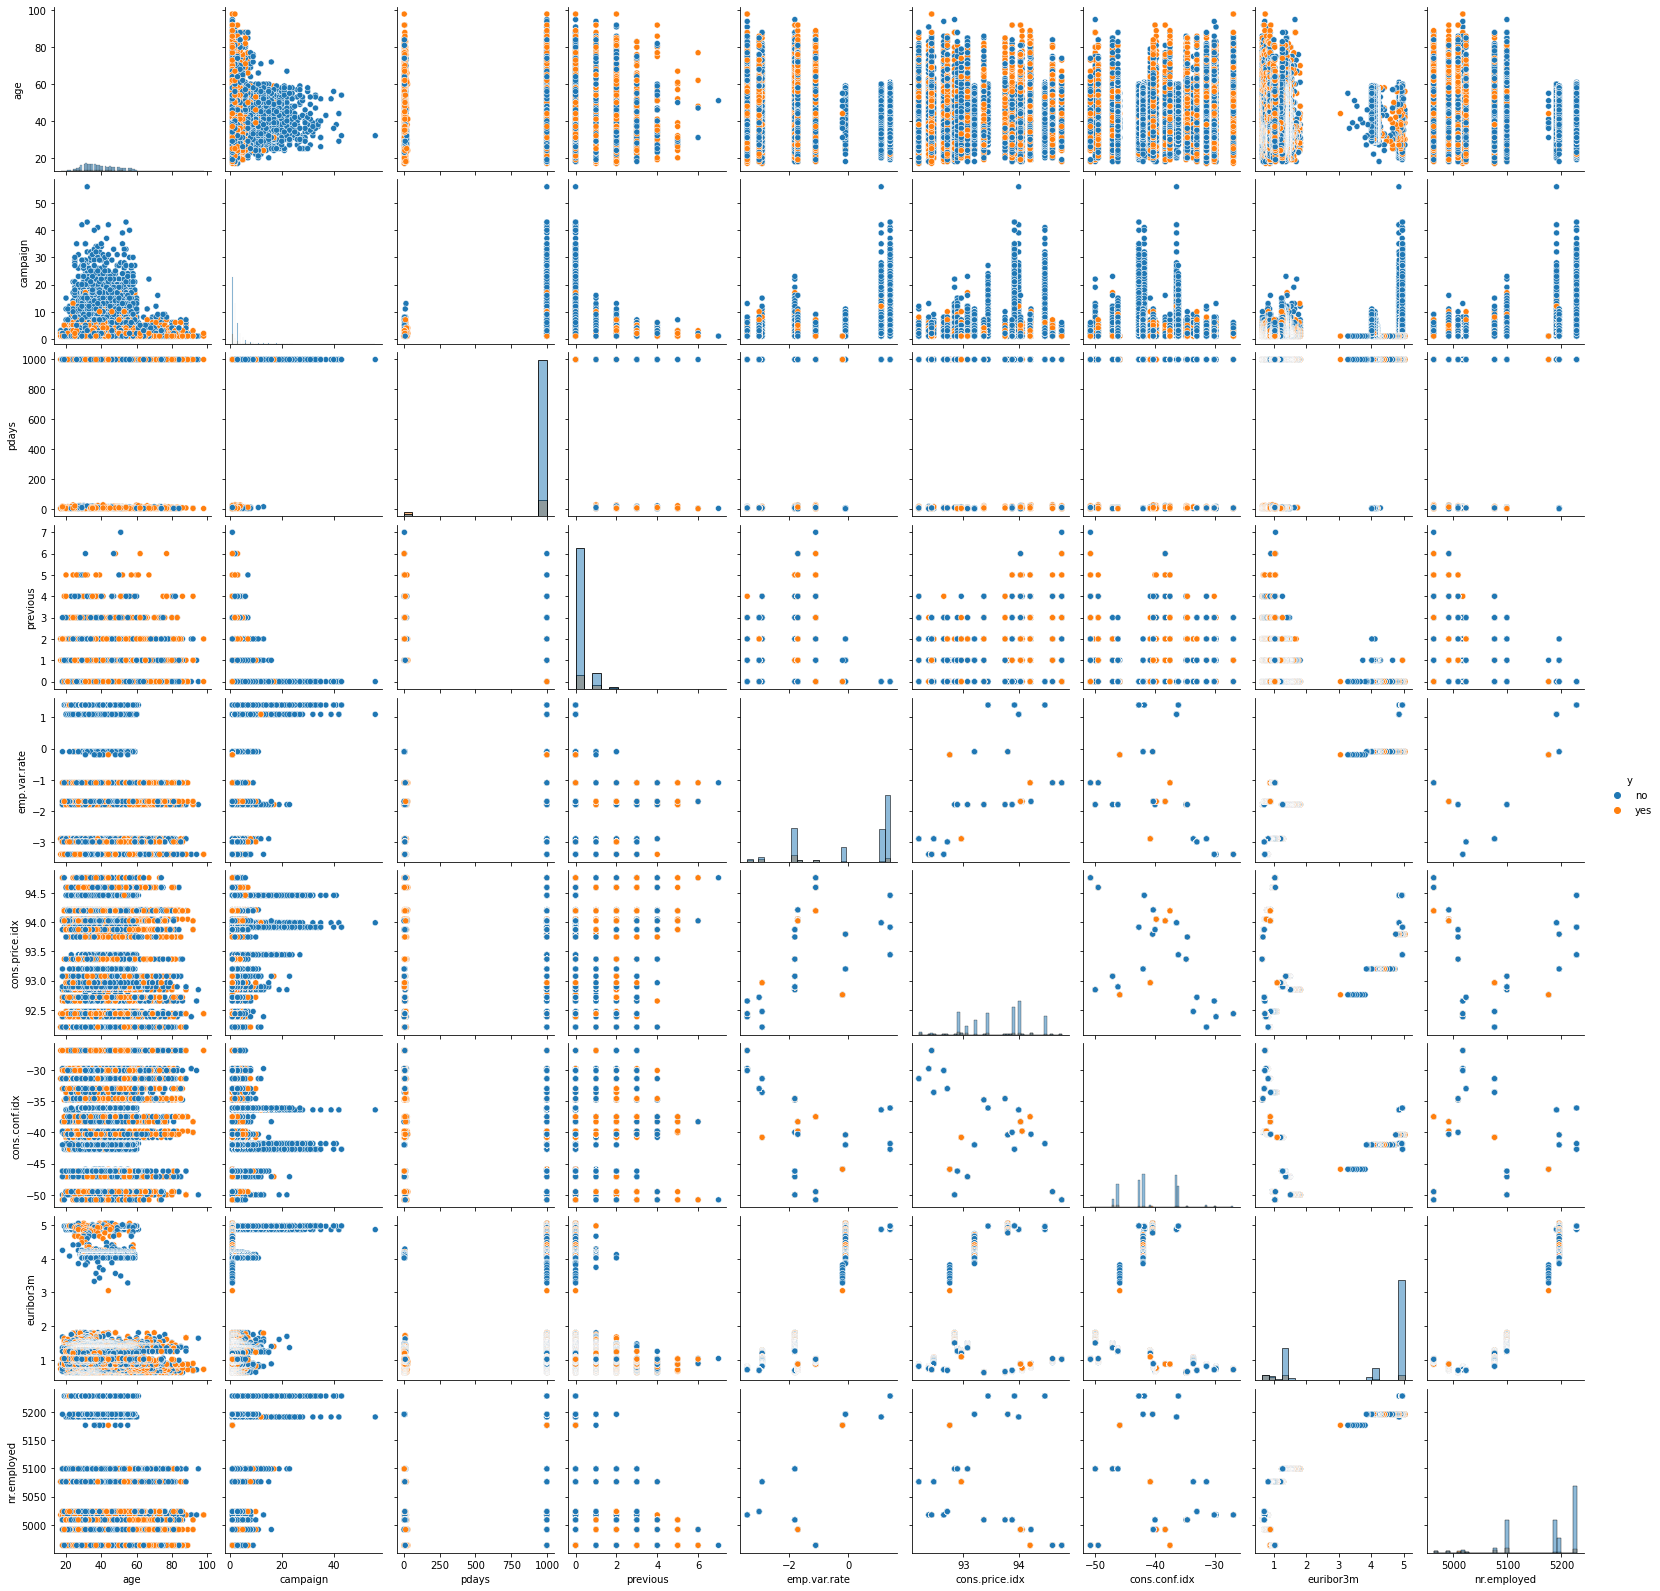

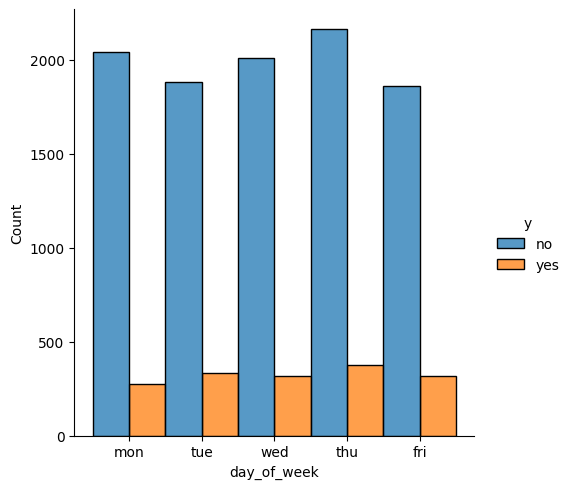

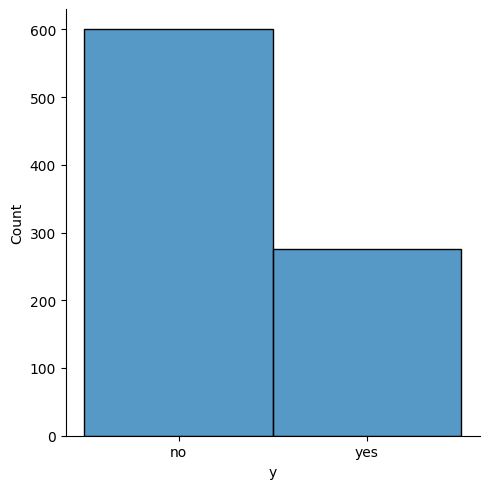

In [4]:
#TODO add more visualizations to compair categorical data
married_data = df_bank[df_bank['marital'] == 'single']
students = df_bank[df_bank['job'] == 'student']

contact_day = sns.displot(data = married_data, x='day_of_week', hue='y', multiple='dodge')
#contact_day_total = sns.displot(data = df_bank, x='day_of_week', hue='y', multiple='dodge')
student = sns.displot(data = students, x='y', multiple='dodge')


contact_day.figure.savefig("contact_day.png")

student.figure.savefig("student.png")


In [ ]:
# count of yes 
# visuale 
# correlation graph
# nth nearest
#

# Preprocess

## One-Hot Encoding

### Pandas

In [5]:
df_bank_encoded = pd.get_dummies(df_bank, drop_first=True)
#features = ["job", "marital", "month", "day_of_week", "poutcome"]
#df_bank_encoded_2 = pd.get_dummies(df_bank[features], drop_first = True)
df_bank_encoded.head()
df_bank_encoded.info()

df_bankholdout_encoded = pd.get_dummies(df_bankholdout, drop_first=True)
df_bankholdout_mini_encoded = pd.get_dummies(df_bankholdout_mini, drop_first=True)


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   job_blue-collar                41188 non-null  uint8  
 10  job_entrepreneur               41188 non-null  uint8  
 11  job_housemaid                  41188 non-null  uint8  
 12  job_management                 41188 non-null 

In [ ]:
# test_data = pd.concat([df_bank, df_bank_encoded])
# include = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
# merged_df_bank = pd.concat([df_bank[include], df_bank_encoded.reindex(df_bank.index)], axis=1)
# merged_df_bank

### scikit-learn (incomplete)

In [6]:
from sklearn.preprocessing import OneHotEncoder as ohe

In [ ]:
# SCRAPPED

# enc = ohe(handle_unknown='ignore')
# features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
#        'contact', 'month', 'day_of_week', 'poutcome', 'y']
# X = df_bank[features]
# enc.fit(X)
# fd = enc.transform([features]).toarray()
# fd = pd.DataFrame(fd)
# fd.head()

## Split Data into Train, Test, and Val Sets

In [7]:
# Train Split Test 

# test & dev together 0.0487

import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_bank_encoded.drop('y_yes',axis = 1), df_bank_encoded['y_yes'], test_size= 0.05, random_state = 42)
X_val, X_test, Y_val, y_test = train_test_split(X_test, y_test, test_size= 0.5)



## Change Preprocessing (Recommended)

If you want to change the way the data is preprocessed, such as removing columns or changing the education column to numerical, etc. here is how you could do it.

````
# make a new variable so that we're not changing the original.
samples = df_bank

# Possibly make alterations to the df_bank_temp DataFrame here. (eg. remove columns)

# Possibly make alterations to the encoding in the line below.
df_bank_encoded = pd.get_dummies(df_bank_temp, drop_first=True)

# if I understand it right, we probably change this part
X_train, X_test, y_train, y_test = train_test_split(df_bank_encoded.drop('y_yes',axis = 1), df_bank_encoded['y_yes'], test_size= 0.05, random_state = 42)
X_val, X_test, Y_val, y_test = train_test_split(X_test, y_test, test_size= 0.5)






````

# Decision Trees

## Austin

DecisionTreeClassifier(random_state=11)

(0.9468317552804079, 1.0, 0.9034817100044072, 4119)

/home/mathidiot/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


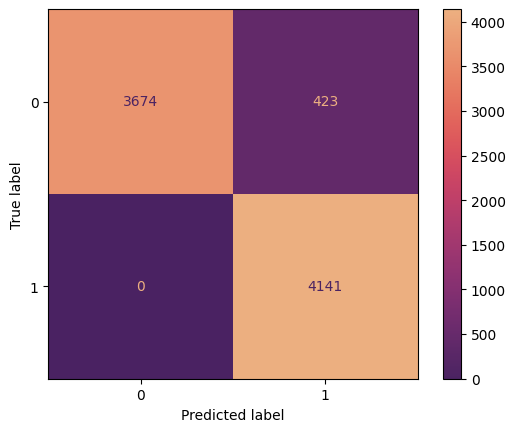

In [114]:
#Austin ML Model

dtc = DecisionTreeClassifier(random_state = 11)

X = df_bank_encoded.drop(['y_yes', 'education_illiterate', 'default_yes'],axis = 1)
y = df_bank_encoded[['y_yes']]

ros = RandomOverSampler(random_state=11)

xee, yee = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(xee, yee, test_size = 0.1127, random_state = 42)
X_val, _, y_val, _ = train_test_split(X_test, y_test, test_size = .5, random_state = 42)

dtc.fit(X_train, y_train)

score = dtc.score(X_val, y_val)
y_pred = dtc.predict(X_val)
recall = recall_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
score, recall, precision, len(y_pred)

pred_df = pd.DataFrame()
pred_df['prediction'] = y_pred
pred_df.to_csv('main_holdout_predictions.csv', index=False)
con_mat = plot_confusion_matrix(dtc, X_test, y_test, cmap='flare_r')

In [115]:
df_bankholdout_mini_encoded = pd.get_dummies(df_bankholdout_mini, drop_first=True)
X = df_bankholdout_mini_encoded
score = dtc.score(X_test, y_test)
y_pred = dtc.predict(X)
y_pred = pd.DataFrame(y_pred).reset_index(drop=True).to_csv('testing-predictions.csv', index=False)
score, y_pred

(0.948652585579024, None)

In [106]:
# Post Training
from joblib import dump, load
dump(dtc, 'trained_model.joblib')

['trained_model.joblib']

## High and Low Confidence Models 

In [116]:
# Consumer Confidence Model -- Spliting the data for the two different models 
#by the consumer confidence index 

High_Confidence = df_bank[df_bank['cons.conf.idx'] >= -41.8]
High_Confidence.head(5)

Low_Confidence = df_bank[df_bank['cons.conf.idx'] <= -41.8]
Low_Confidence.head(5)




,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7763,26,management,single,university.degree,no,no,no,telephone,jun,mon,3,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
7764,42,technician,married,professional.course,unknown,no,no,telephone,jun,mon,9,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
7765,30,admin.,married,university.degree,no,no,no,telephone,jun,mon,2,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
7766,55,technician,married,basic.9y,no,no,no,telephone,jun,mon,3,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
7767,41,blue-collar,married,basic.4y,no,yes,no,telephone,jun,mon,2,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no




High Confidence Dataset


DecisionTreeClassifier(random_state=11)


score


0.9175123601353109


recall


0.9674418604651163


precision


0.8805268109125117



Low Confidence Dataset


/home/mathidiot/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


DecisionTreeClassifier(random_state=11)


score


0.9231126596980256


recall


0.983575786015955


precision


0.8762541806020067

/home/mathidiot/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


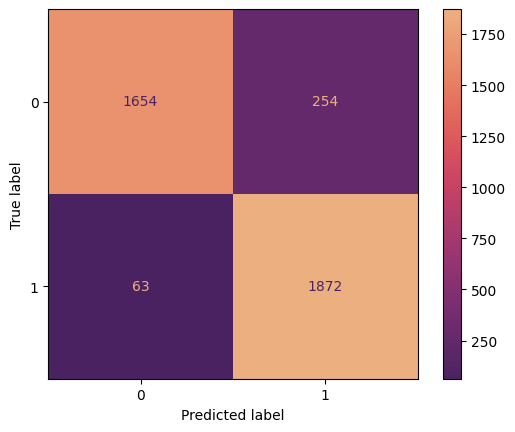

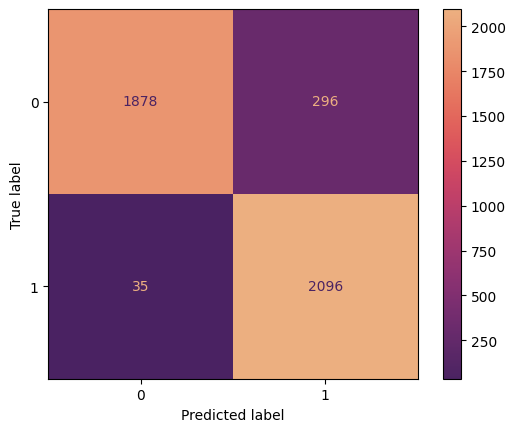

In [117]:

for loop_data in [["High Confidence Dataset",High_Confidence],["Low Confidence Dataset", Low_Confidence]]:
  print ("\n\n"+loop_data[0])

  loop_df = pd.get_dummies(loop_data[1], drop_first=True)

  dtc = DecisionTreeClassifier(random_state = 11)

  X = loop_df[['age', 'campaign', 'emp.var.rate', 'cons.conf.idx', 'euribor3m',
        'job_blue-collar', 'job_entrepreneur', 'job_self-employed', 'job_services',
        'job_student', 'education_high.school', 'loan_yes', 'poutcome_success']]

  y = loop_df[['y_yes']]

  ros = RandomOverSampler(random_state=11)
  xee, yee = ros.fit_resample(X, y)

  X_train, X_test, y_train, y_test = train_test_split(xee, yee, test_size = 0.2, random_state = 42)
  X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = .5, random_state = 42)

  dtc.fit(X_train, y_train)

  score = dtc.score(X_test, y_test)
  y_pred = dtc.predict(X_test)
  recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  print ("\nscore")
  score
  print ("\nrecall")
  recall
  print ("\nprecision")
  precision

  # pd.DataFrame(y_pred).reset_index(drop=True).to_csv('main_holdout_predictions.csv', index=False)
  con_mat = plot_confusion_matrix(dtc, X_test, y_test, cmap='flare_r')

In [ ]:
# do the preprocessing (Skipping splitting) on df_bankholdout data the same as the one we picked 

X_out = df_bankholdout_mini_encoded[['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_professional.course',
       'education_university.degree', 'default_unknown',
       'housing_yes',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']]

X_out['education_illiterate'] = 0
X_out['default_yes'] = 0
X_out.shape

# run that data through the tree we picked to generate the predictions
out_Pred = final_dtc.predict(X_out)
prediction = pd.DataFrame(out_Pred, columns=['predictions']).to_csv('team8-module2-predictions.csv', index=False)
X_out

# Save those predictions to CSV file like the example below so that we can turn it in.
# https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_csv_answers_sample.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(206, 47)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


## TJ

In [ ]:
# TJ ML Model
# test = 2/41
#df_bank_encoded[['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
#       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
#       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
#       'job_management', 'job_retired', 'job_self-employed', 'job_services',
#       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
#       'marital_married', 'marital_single', 'marital_unknown',
#       'education_basic.6y', 'education_basic.9y', 'education_high.school',
#       'education_illiterate', 'education_professional.course',
#       'education_university.degree', 'education_unknown', 'default_unknown',
#       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
#       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
#       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
#       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
#       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']]

TJ_Features = df_bank_encoded[['age', 'campaign', 'previous', 
       'cons.price.idx', 'cons.conf.idx',
       'job_student', 'marital_single',
       'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_success']]
TJ_Y = df_bank_encoded[['y_yes']]

TJ_Train, TJ_Test, TJ_Y_Train, TJ_Y_Test  = skl.model_selection.train_test_split(TJ_Features,
                                                                                 TJ_Y, 
                                                                                 test_size=0.05, 
                                                                                 random_state=42)
TJ_dtc = DecisionTreeClassifier(max_depth = 4)
TJ_dtc.fit(TJ_Train, TJ_Y_Train)
TJ_dtc.score(TJ_Test, TJ_Y_Test)

DecisionTreeClassifier(max_depth=4)

0.8990291262135922

## ML Hold out Mini Test Set


In [ ]:
# ML Hold out Mini Test Set

X_2 = pd.get_dummies(df_bankholdout_mini, drop_first = True)
X_2[['education_illiterate', 'default_yes']] = 0
X_Pred = X_2[['age', 'campaign', 'pdays', 'nr.employed',
      'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
      'job_management', 'job_retired', 'job_self-employed', 'job_services',
      'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
      'marital_married', 'marital_single', 'marital_unknown',
      'education_basic.6y', 'education_basic.9y', 'education_high.school',
      'education_illiterate', 'education_professional.course',
      'education_university.degree', 'education_unknown', 'default_unknown',
      'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
      'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
      'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
      'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
      'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']]

       

X_sor = df_bank_encoded[['age', 'campaign', 'previous', 
       'cons.price.idx', 'cons.conf.idx',
       'job_student', 'marital_single',
       'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_success']]
y_sor = df_bank_encoded[['y_yes']]
X_sor.shape
print('X-ped')
X_Pred.shape

X_train, X_test, y_train, y_test  = skl.model_selection.train_test_split(X_sor, y_sor, test_size=0.0487, random_state=42)
print('x train')
X_train.shape
dtc_sor = DecisionTreeClassifier(max_depth=5)
dtc_sor.fit(X_train, y_train)


# df_new["prdiction"] = py
# csv = df_new[['id',"prediction"]]
# csv.to_csv("submission.csv", index = False)

#dtc.score(y, py, sample_weight=None)


(41188, 21)

X-ped


(206, 47)

x train


(39182, 21)

DecisionTreeClassifier(max_depth=5)

In [ ]:
merged_df_bank.columns

NameError: ignored

# Create Prediction CSV

In [ ]:
# Contact Frequency Question / Graph 


contact_frequency_plot = sns.boxplot(data=df_bank, x="y", y="campaign", showfliers = False)

column = df_bank["campaign"]
max_value = column.max()
print(max_value)


# swarm_plot = sns.swarmplot(...)
# fig = swarm_plot.get_figure()
# fig.savefig("out.png") 
fig_2 = contact_frequency_plot.get_figure()
fig_2.savefig("out.png")

#sns.countplot(data=df_bank, x="campaign", hue='y')

